# 

# Video Game Sales Analysis #

***Included herein is an analysis for an online video game store, which provides actionable guidance in developing ad campaings that will generate the greatest return on investment.***

### Preprocessing Data ###

##  ##

In [2]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
from functools import reduce
%matplotlib inline



#! pip install --upgrade seaborn#    sns.histplot() does not work on jupyterhub
#! pip install --upgrade matplotlib

In [3]:
df = pd.read_csv('/datasets/games.csv')

In [4]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### **Making all columns names lower case** ####

In [5]:
df.columns = map(str.lower, df.columns)

In [6]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
df.isna().sum() / df.shape[0]

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [10]:
df['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [11]:
df.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
df= df.dropna(subset=['name', 'platform', 'genre'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### **Changing Datatypes** ####

In [14]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
df.year_of_release.isna().sum() 

269

#### **Extracting Release Year from Game Name** ####

**Student Comment**: Was conflicted about droppig rows with missing year vlaues because some games indicate year in title and can extract year therefrom.

In [20]:
import warnings 
warnings.filterwarnings("ignore")
df['release_year'] = df.name.str.extract('(\d+)')

In [21]:
df['release_year']#Need to account for '1800'
df.query('release_year < "900"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,release_year
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,3
26,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,3.43,5.35,5.32,1.18,77.0,7.1,E,2
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,3
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,3
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,15
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,5
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,1000
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2007


In [22]:
df= df.dropna(subset=['year_of_release'])

In [23]:
df['year_of_release'].isna().sum()

0

In [24]:
df['year_of_release'] = df['year_of_release'].astype('int64')

#### **Deleting two rows with few data because it will have an insignificant effect on the final analysis.** ####

In [25]:
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,release_year


In [26]:
df= df.dropna(subset=['genre'])

In [27]:
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,release_year


In [28]:
df.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [29]:
df['critic_score'].isna().sum()

8461

In [30]:
df.critic_score.value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, Length: 81, dtype: int64

In [31]:
df.query('critic_score == "76"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,release_year


**Proportrion of missing data**
>>**critic_score:**       0.513192

>>**user_score:**         0.400897

>>**rating:**             0.404786



In [32]:
df['critic_score'] = df['critic_score'].fillna('Unknown')

In [33]:
df[df['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,release_year


In [34]:
df['user_score'] = df['user_score'].fillna(df.groupby(['platform','genre'])['user_score'].median)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       16444 non-null  object 
 10  rating           9768 non-null   object 
 11  release_year     4545 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.6+ MB


In [36]:
df['critic_score'].isna().sum()

0

In [37]:
df.user_score.unique()

array(['8',
       <bound method GroupBy.median of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f2cdcbfbf10>>,
       '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2', '9',
       '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

#### **Changing score columns to integer data types, which will later streamline statistical analysis.** ####

In [38]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [39]:
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')

In [40]:
df.user_score.describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [41]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,release_year


**User scores from recently released games may be unavailable.**

In [42]:
df.user_score = df.user_score.replace('tbd', '')

In [43]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,release_year


In [44]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


#### **Calculating the Sales Totals** ####

In [47]:
df['na_sales_total'] = df['na_sales'].sum()
df['eu_sales_total'] = df['eu_sales'].sum()
df['na_sales_total'] = df['na_sales'].sum()
df['jp_sales_total'] = df['jp_sales'].sum()
df['other_sales_total'] = df['other_sales'].sum()

df['total_sales'] = df['na_sales_total'] + df['eu_sales_total'] + df['na_sales_total'] + df['jp_sales_total'] + df['other_sales_total']




In [48]:
df


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,release_year,na_sales_total,eu_sales_total,jp_sales_total,other_sales_total,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,NaN,4341.42,2399.68,1290.64,782.63,13155.79
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,4341.42,2399.68,1290.64,782.63,13155.79
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,NaN,4341.42,2399.68,1290.64,782.63,13155.79
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,NaN,4341.42,2399.68,1290.64,782.63,13155.79
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,4341.42,2399.68,1290.64,782.63,13155.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,4341.42,2399.68,1290.64,782.63,13155.79
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2007,4341.42,2399.68,1290.64,782.63,13155.79
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,4341.42,2399.68,1290.64,782.63,13155.79
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,4341.42,2399.68,1290.64,782.63,13155.79


### Analyze the data ###

**Analysis**: ***Below, the scatterplot tends to show that a reashenable starting year for analysis in forecasting for 2017 may be 2010-11, because the  confluence of the  platforms on te market, technological relevancy, macroeconimics, and resulting consumer behavior are likely  more predictive and useful. Moreover, s platform's viability is circumscribed by, approximately 10 year cycles, whereupon their popularity wanes, and the platform disappears completely, like the Atari; or, successor platforms, that is, new models produced by the same company, supplement and eventually replace the predecessor console. Also, hand-held devices, like the "PSP," "PSV", "Gameboy," "Wii U," etc., idisyncratically have shorter market viability than stand-alone consoles. In addition, anomolous consoles, e.g. "3DO" and "Sega Saturn" had brief stints on the market. ***  

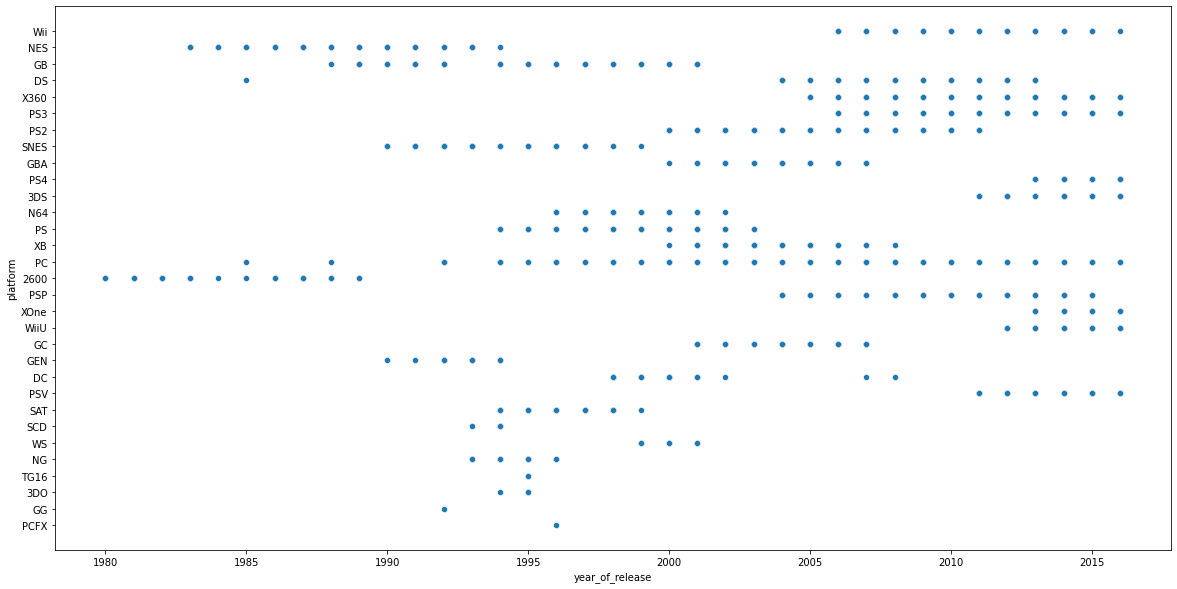

In [49]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="year_of_release", y='platform')
plt.show()

In [50]:
PSV_year_filter = df.query('platform == "PSV" & year_of_release > 2010')
PS4_year_filter = df.query('platform == "PS4" & year_of_release > 2010')
PS3_year_filter = df.query('platform == "PS3" & year_of_release > 2010')
Wii_year_filter = df.query('platform == "Wii" & year_of_release > 2010')
X360_year_filter = df.query('platform == "X360" & year_of_release > 2010')
XOne_year_filter = df.query('platform == "XOne" & year_of_release > 2010')
WiiU_year_filter = df.query('platform == "WiiU" & year_of_release > 2010')




## **Games Released Annually** ##

**Analysis**: ***Of the sample taken from the most poular game platforms, when a company releases a new platform the number of games sold tends to be minimal compared to industry piers, and compared to older platforms by the same company; however, subsequently the dyanmic markedly reverses, and the new plaform overtakes the game revenue derived from the older iteration of the consloe from the same company. Still***

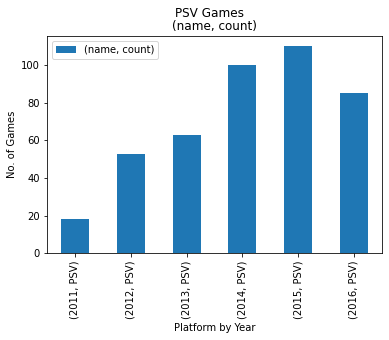

In [51]:
PSV_game_count = PSV_year_filter.groupby(['year_of_release', 'platform']).agg({'name': ['count']}).plot(kind="bar", title='PSV Games', xlabel='Platform by Year', ylabel='No. of Games', fontsize=10, subplots=True)

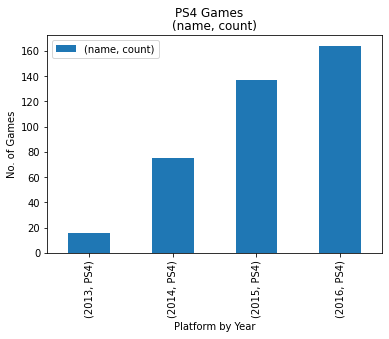

In [52]:
#PS4 = year_filter.query('platform == "PS4"')

PS4_game_count = PS4_year_filter.groupby(['year_of_release', 'platform']).agg({'name': ['count']}).plot(kind="bar", title='PS4 Games', xlabel='Platform by Year', ylabel='No. of Games', fontsize=10, subplots=True)

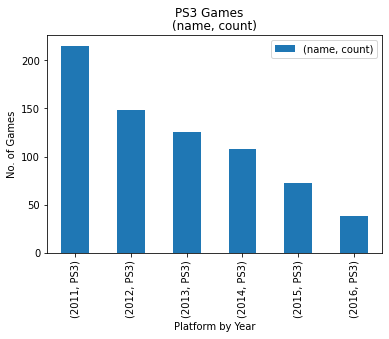

In [53]:
PS3_game_count = PS3_year_filter.groupby(['year_of_release', 'platform']).agg({'name': ['count']}).plot(kind="bar", title='PS3 Games', xlabel='Platform by Year', ylabel='No. of Games', fontsize=10, subplots=True)

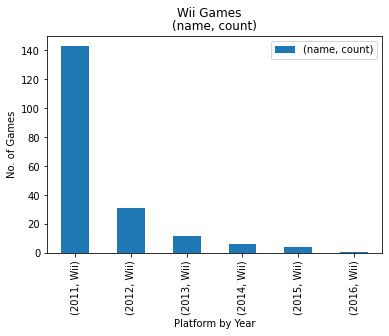

In [54]:
Wii_game_count = Wii_year_filter.groupby(['year_of_release', 'platform']).agg({'name': ['count']}).plot(kind="bar", title='Wii Games', xlabel='Platform by Year', ylabel='No. of Games', fontsize=10, subplots=True)

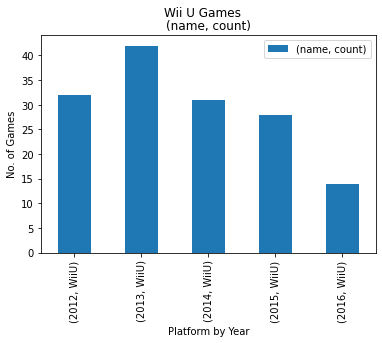

In [55]:
WiiU_game_count = WiiU_year_filter.groupby(['year_of_release', 'platform']).agg({'name': ['count']}).plot(kind="bar", title='Wii U Games', xlabel='Platform by Year', ylabel='No. of Games',  fontsize=10, subplots=True)
 

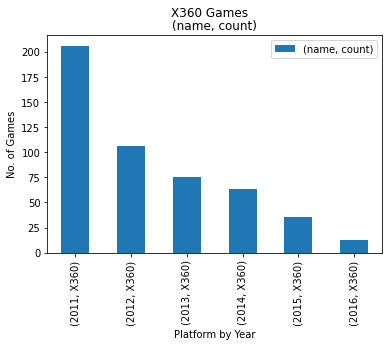

In [56]:
X360_game_count = X360_year_filter.groupby(['year_of_release', 'platform']).agg({'name': ['count']}).plot(kind="bar", title='X360 Games', xlabel='Platform by Year', ylabel='No. of Games', fontsize=10, subplots=True)

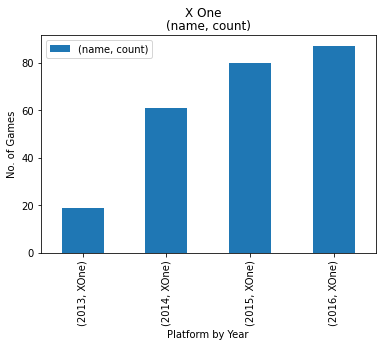

In [57]:
XOne_game_count = XOne_year_filter.groupby(['year_of_release', 'platform']).agg({'name': ['count']}).plot(kind="bar", title='X One', xlabel='Platform by Year', ylabel='No. of Games', fontsize=10, subplots=True)
#.filter(lambda x: x["platform"] == x["PS4"])
#game_count

## Sales by Platform ##

In [59]:
year_filter = df.query('year_of_release > 2010')

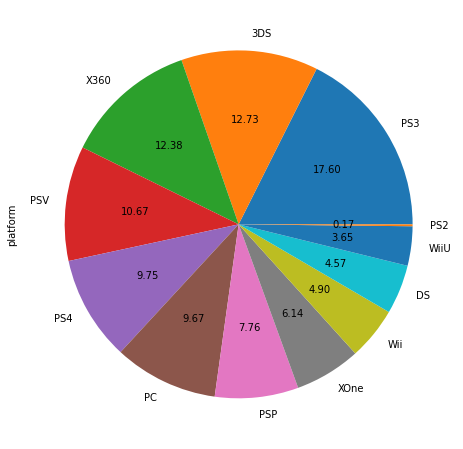

In [61]:
plt.figure(figsize=(8, 8))
year_filter.platform.value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

***The North American region is a robust market whereby revenue is disproportionately generated herein. Still, the overall trend is a secular downtrend. Here, XOne and PS4 have led the market, by a large margin, for two years preceding 2017, and have overtaken their predecessors, X360 and PS3 in sales in  the last 3 years.  PSV ahers to the axiom that hand held devices lose popularity quickly. Moreover, the PSP has become obsolete, with no sales since 2013.***

na_sales
                              sum
year_of_release platform         
2011            3DS         27.34
                DS          14.27
                PC          10.76
                PS2          0.13
                PS3         64.88
                PSP          2.06
                PSV          1.49
                Wii         31.11
                X360        86.75
2012            3DS         17.11
                DS           4.02
                PC           8.01
                PS3         39.88
                PSP          0.13
                PSV          5.94
                Wii         10.89
                WiiU         8.89
                X360        58.39
2013            3DS         15.56
                DS           0.57
                PC           3.88
                PS3         41.45
                PS4         10.13
                PSP          0.00
                PSV          2.52
                Wii          4.48
                WiiU         9.85
                X360        53.36
                XOne        11.85
2014            3DS         12.33
                PC           3.51
                PS3         16.39
                PS4         34.75
                PSP          0.00
                PSV          1.98
                Wii          1.59
                WiiU        10.50
                X360        20.25
                XOne        30.97
2015            3DS          6.17
                PC           2.36
                PS3          4.99
                PS4         42.37
                PSP          0.00
                PSV          0.39
                Wii          0.43
                WiiU         6.76
                X360         7.36
                XOne        36.03
2016            3DS          4.14
                PC           1.36
                PS3          0.67
                PS4         21.49
                PSV          0.15
                Wii          0.06
                WiiU         2.10
                X360         0.69
                XOne        14.27

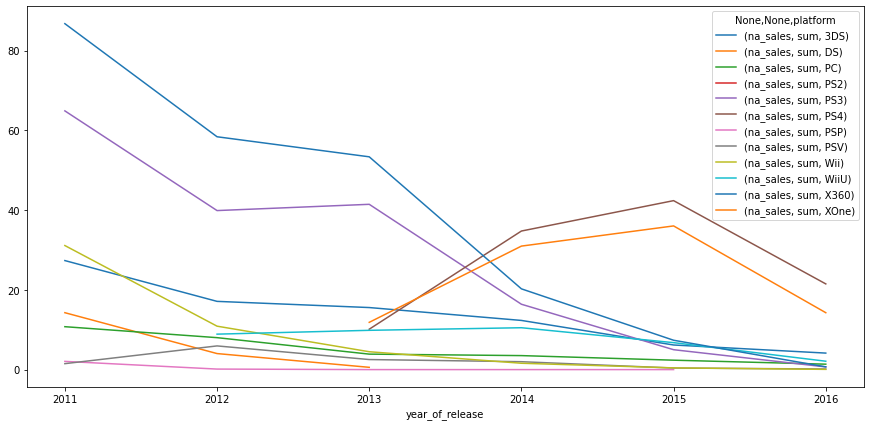

In [62]:
fig, ax = plt.subplots(figsize=(15,7))


na_sales = year_filter.groupby(['year_of_release', 'platform']).agg({'na_sales': ['sum']}).unstack().plot(ax=ax)

year_filter.groupby(['year_of_release', 'platform']).agg({'na_sales': ['sum']})

***In the EU, PS3 remained the market leader, by a large margin, until it was overtaken by its successor PS4 in 2014, which genefrated $46.5 mill & $18.24 mill, respectively.*** 

eu_sales
                              sum
year_of_release platform         
2011            3DS         18.63
                DS           5.71
                PC          18.94
                PS2          0.13
                PS3         56.24
                PSP          1.35
                PSV          1.71
                Wii         17.68
                X360        42.58
2012            3DS         11.68
                DS           2.68
                PC          12.40
                PS3         39.05
                PSP          0.25
                PSV          5.26
                Wii          5.99
                WiiU         5.28
                X360        32.00
2013            3DS         14.84
                DS           0.85
                PC           7.39
                PS3         42.27
                PS4         11.05
                PSP          0.17
                PSV          2.57
                Wii          3.34
                WiiU         6.70
                X360        27.03
                XOne         5.34
2014            3DS          8.73
                PC           8.87
                PS3         18.24
                PS4         46.50
                PSP          0.00
                PSV          2.45
                Wii          1.86
                WiiU         6.66
                X360        11.28
                XOne        18.15
2015            3DS          5.06
                PC           5.57
                PS3          6.04
                PS4         51.76
                PSP          0.00
                PSV          0.69
                Wii          0.62
                WiiU         5.01
                X360         3.50
                XOne        18.47
2016            3DS          2.33
                PC           3.53
                PS3          1.26
                PS4         31.78
                PSV          0.39
                Wii          0.11
                WiiU         1.48
                X360         0.71
                XOne         9.63

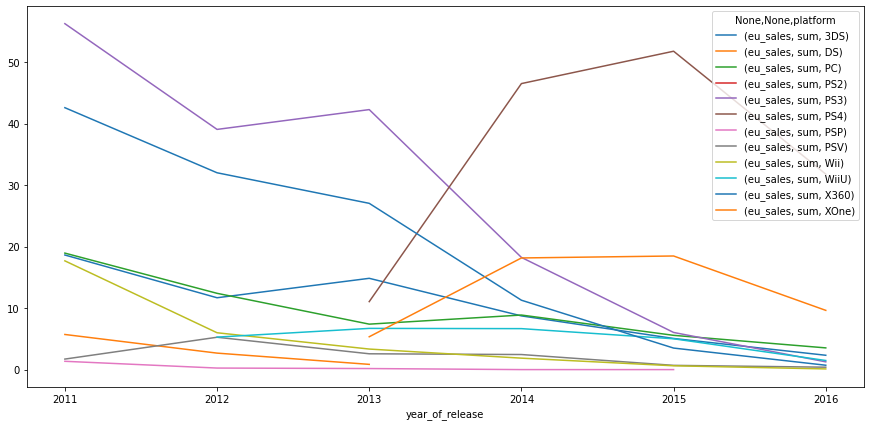

In [63]:
fig, ax = plt.subplots(figsize=(15,7))
eu_sales = year_filter.groupby(['year_of_release', 'platform']).agg({'eu_sales': ['sum']}).unstack().plot(ax=ax)
year_filter.groupby(['year_of_release', 'platform']).agg({'eu_sales': ['sum']})

***In Japan, 3DS is the market leader, which peaked at $20 mil in 2014; subsequently, revenue has pulled back along with sales for every other platfom; nevertheless, 3DS remains the leader there, to date.***

jp_sales
                              sum
year_of_release platform         
2011            3DS         12.83
                DS           4.32
                PC           0.00
                PS2          0.09
                PS3         14.10
                PSP         13.57
                PSV          0.80
                Wii          5.58
                X360         1.78
2012            3DS         19.98
                DS           3.72
                PC           0.00
                PS3         11.94
                PSP          7.18
                PSV          2.45
                Wii          3.34
                WiiU         2.13
                X360         1.06
2013            3DS         23.57
                DS           0.00
                PC           0.00
                PS3         12.13
                PS4          0.94
                PSP          2.93
                PSV          4.05
                Wii          0.05
                WiiU         3.57
                X360         0.43
                XOne         0.02
2014            3DS         20.69
                PC           0.00
                PS3          6.25
                PS4          2.97
                PSP          0.24
                PSV          6.13
                Wii          0.00
                WiiU         3.19
                X360         0.08
                XOne         0.14
2015            3DS         15.52
                PC           0.00
                PS3          3.67
                PS4          6.31
                PSP          0.12
                PSV          4.85
                Wii          0.00
                WiiU         3.45
                X360         0.00
                XOne         0.17
2016            3DS          8.03
                PC           0.00
                PS3          1.30
                PS4          5.74
                PSV          3.56
                Wii          0.00
                WiiU         0.67
                X360         0.00
                XOne         0.01

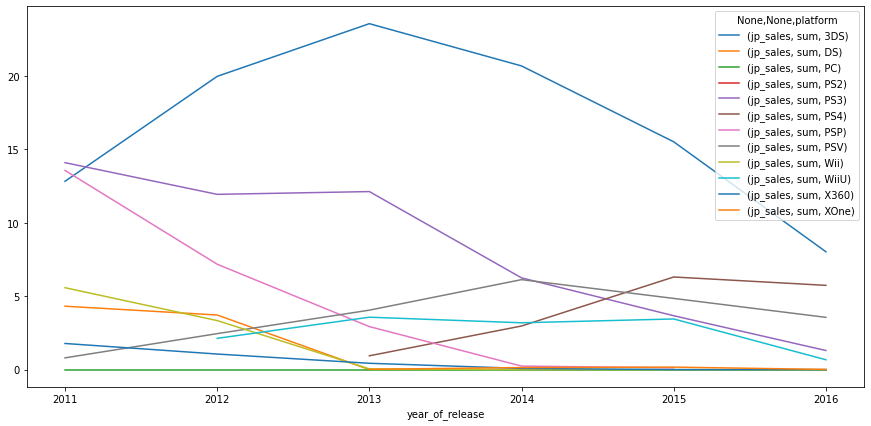

In [64]:
fig, ax = plt.subplots(figsize=(15,7))
jp_sales = year_filter.groupby(['year_of_release', 'platform']).agg({'jp_sales': ['sum']}).unstack().plot(ax=ax)

year_filter.groupby(['year_of_release', 'platform']).agg({'jp_sales': ['sum']})

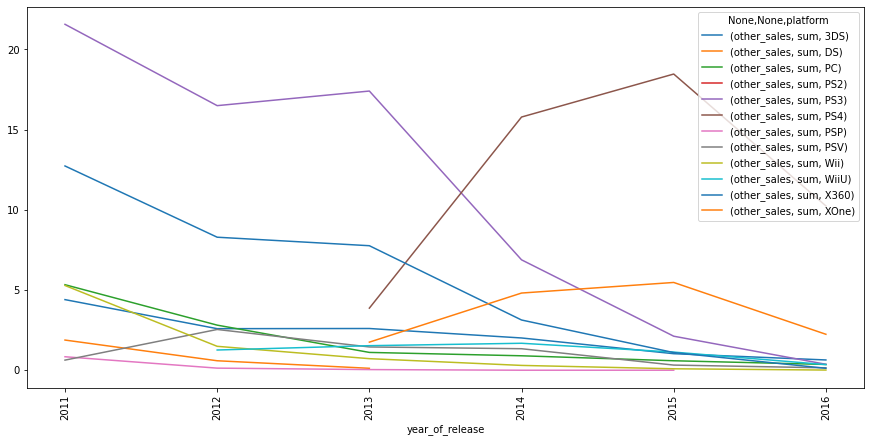

other_sales
                                 sum
year_of_release platform            
2011            3DS             4.40
                DS              1.88
                PC              5.33
                PS2             0.10
                PS3            21.56
                PSP             0.84
                PSV             0.63
                Wii             5.28
                X360           12.73
2012            3DS             2.59
                DS              0.59
                PC              2.81
                PS3            16.49
                PSP             0.13
                PSV             2.54
                Wii             1.49
                WiiU            1.26
                X360            8.29
2013            3DS             2.60
                DS              0.12
                PC              1.11
                PS3            17.40
                PS4             3.87
                PSP             0.04
                PSV             1.45
                Wii             0.72
                WiiU            1.53
                X360            7.76
                XOne            1.75
2014            3DS             2.01
                PC              0.90
                PS3             6.88
                PS4            15.78
                PSP             0.00
                PSV             1.34
                Wii             0.30
                WiiU            1.68
                X360            3.13
                XOne            4.81
2015            3DS             1.03
                PC              0.59
                PS3             2.12
                PS4            18.46
                PSP             0.00
                PSV             0.32
                Wii             0.09
                WiiU            1.13
                X360            1.10
                XOne            5.47
2016            3DS             0.64
                PC              0.36
                PS3             0.37
                PS4            10.24
                PSV             0.15
                Wii             0.01
                WiiU            0.35
                X360            0.12
                XOne            2.24

In [65]:
fig, ax = plt.subplots(figsize=(15,7))
other_sales = year_filter.groupby(['year_of_release', 'platform']).agg({'other_sales': ['sum']}).unstack().plot(ax=ax)
plt.xticks(rotation=90)
plt.show()

year_filter.groupby(['year_of_release', 'platform']).agg({'other_sales': ['sum']})

# 2017 Forecast:
 ***Overall, PS4 has been typified by a significant bull market since the platform was released in 2013. The only other platform that is in an uptrend is XOne, though momentum in its popularity during th 2015 -16 period exhibits signs of exhaustion and is in a sideways trend.  Furthermore, the PC was in a downtrend from 2011 - 2013, but a trend reversal has occured thereupon, and, according to the data, is the only other market in a perceptible uptrend. That is, the rest of the plaforms' sales are declining. Absent a significant catalyst, e.g. release of a transformative new prouct or other material changes in market dynamics, the trends described herein will likely continue.***

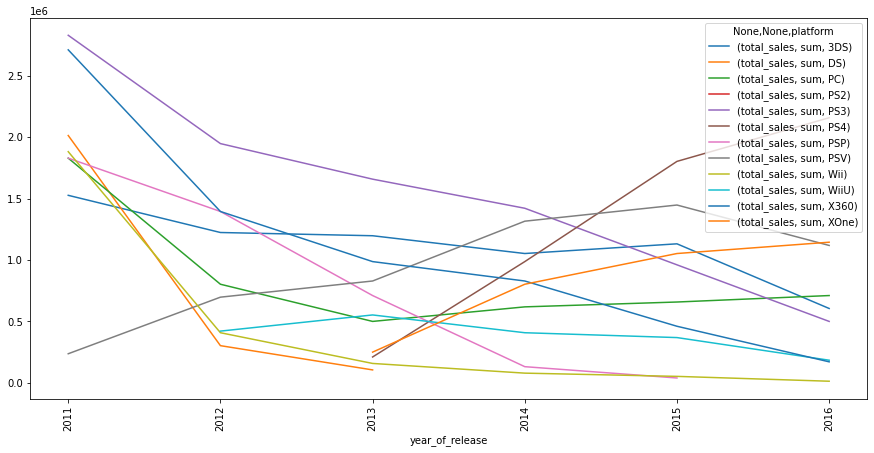

In [66]:


    fig, ax = plt.subplots(figsize=(15,7))
    Total = year_filter.groupby(['year_of_release', 'platform']).agg({'total_sales': ['sum']}).unstack().plot(ax=ax)
    plt.xticks(rotation=90)
    plt.show()

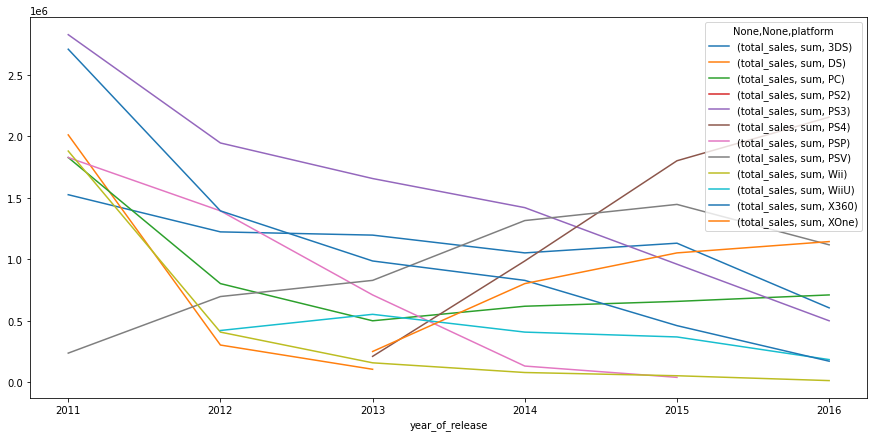

In [67]:
fig, ax = plt.subplots(figsize=(15,7))
year_filter.groupby(['year_of_release', 'platform']).agg({'total_sales': ['sum']}).unstack().plot(ax=ax)
plt.show()

***The action and sports genres are have the longest bouts of consistent popularity. Simulation games had outlier years from 2005-2009. Likewise, adventure games popularity falls within the same surge period.***

<Figure size 2880x1440 with 0 Axes>

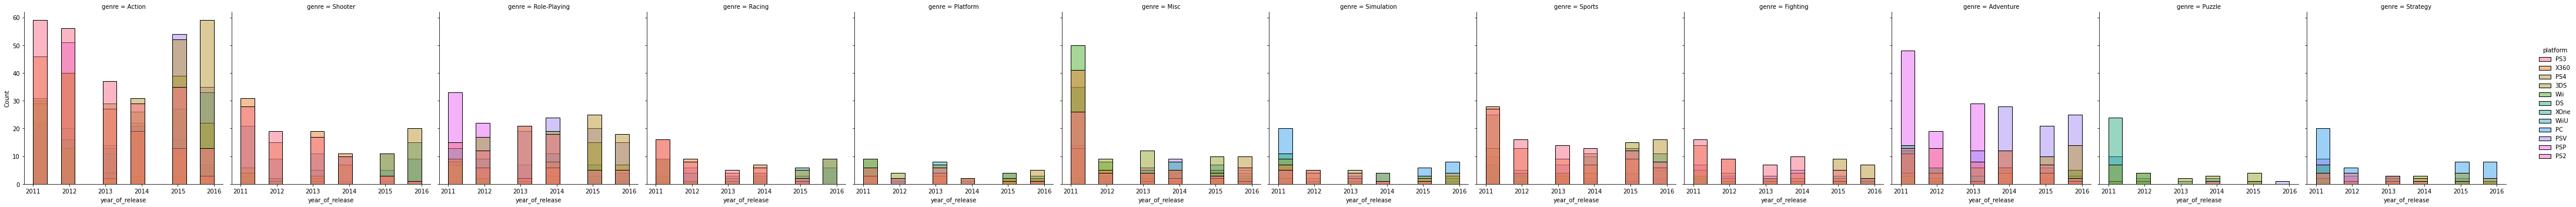

In [72]:
plt.figure(figsize=(40,20))
sns.displot(data=year_filter, x="year_of_release", hue="platform", col="genre")
plt.show()

**Total Sales by Platform**

<Figure size 1440x720 with 0 Axes>

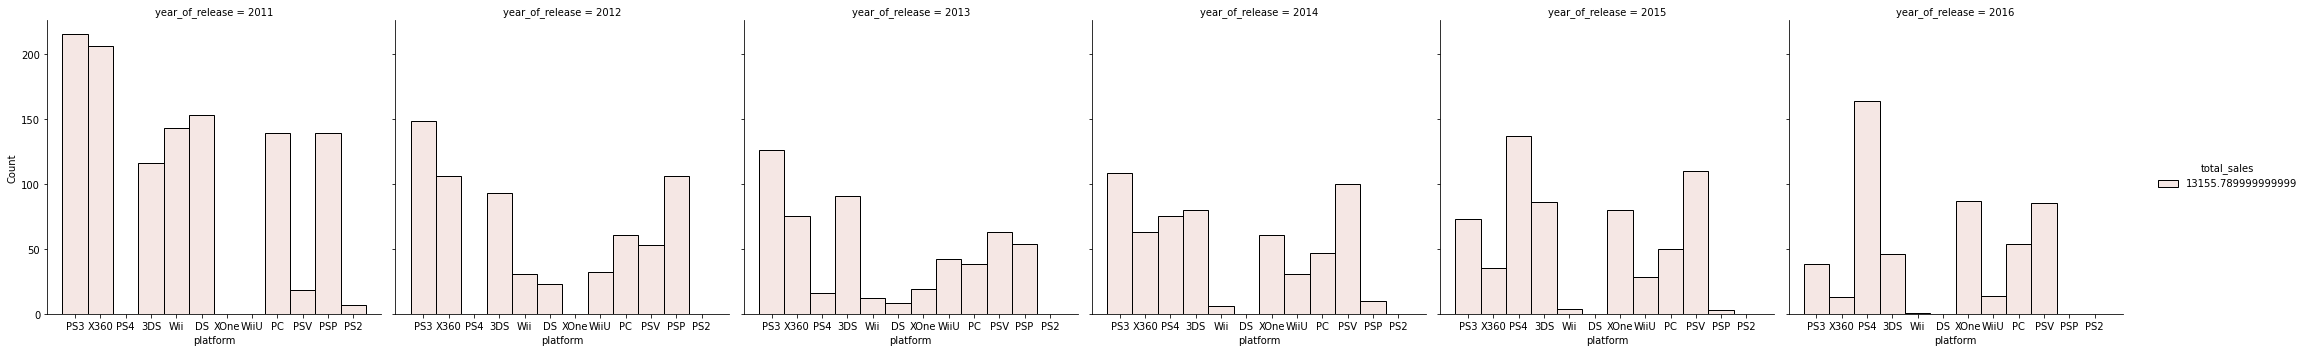

In [73]:
plt.figure(figsize=(20,10))
sns.displot(data=year_filter, x="platform", hue="total_sales", col="year_of_release")

plt.show()

## Boxplot Sales per Platform ##

In [75]:
year_filter.name.value_counts()

LEGO Marvel Super Heroes              9
FIFA 14                               9
The LEGO Movie Videogame              8
FIFA Soccer 13                        8
Angry Birds Star Wars                 8
                                     ..
Final Fantasy Explorers               1
Entaku no Seito: Students of Round    1
The Secret World                      1
The Sims 3: Barnacle Bay              1
Hakuouki: Zuisouroku DS               1
Name: name, Length: 2418, dtype: int64

## **Professional Reviews v. Sales** ##

**Generally, a critic's score and sales tend to be directly proportional; that is,   a correlation likely exists between a critic's score and sales. However,  the North American Market adn European markets have the strongest correlation, and in Japan there is a perceptably lower degree of correlation. To that end, the pearson correlation calulation  reflect these conclusions. In addition, you will find the North American, European, and Japanese markets "scatterplots" below.**

In [78]:
year_filter['critic_score'].corr(year_filter['na_sales'])


0.30811332869435265

In [79]:
year_filter['critic_score'].corr(year_filter['eu_sales'])


0.31009815705823046

In [80]:
year_filter['critic_score'].corr(year_filter['jp_sales'])


0.12945181525104413

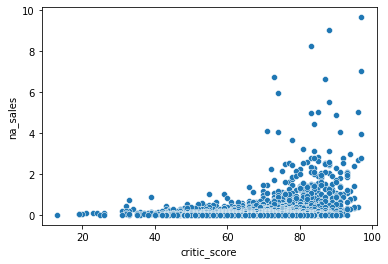

In [81]:
sns.scatterplot(data=year_filter, x="critic_score", y="na_sales")
plt.show()

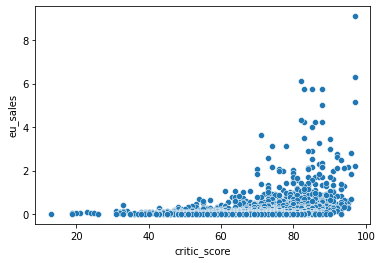

In [82]:
sns.scatterplot(data=year_filter, x="critic_score", y="eu_sales")
plt.show()

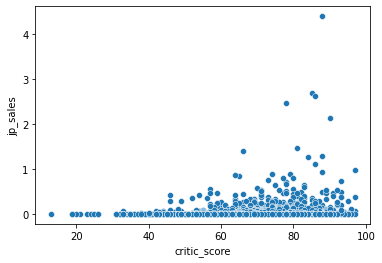

In [83]:
sns.scatterplot(data=year_filter, x="critic_score", y="jp_sales")
plt.show()

## **ESRB v. Sales** ##

**Generally, a wider consumer base tends to generate more sales. That is, if a game is rated "Everyone," then more games will be sold because it inlcudes a  wider demographic, conceivably, includes a significant child consumer base. Games with more explicit and violent content tend to generate less sales, comparatively; this dynamic may have some correlation with the  genre's market share, e.g. many Sports and Ation games are likely rated "E," and below, together, these genres comprise more than 52% of sale in the most popular platforms. Still, in North America and Europe, "Mature" and "Teen" audience games are more popular than all the other rated game genres. Interestingly, in Japan, "Teen" rated games are more profitable than "Mature" audience games, which may be attributed to the culture idiosyncrasies, median age, and consumer prefernces in Japan.**

**In North America, Shooter, Sports, Platform, fighting, and action genres, should be prioritized in the stated order.**

In [200]:
year_filter.genre.unique()

array(['Action', 'Shooter', 'Role-Playing', 'Racing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

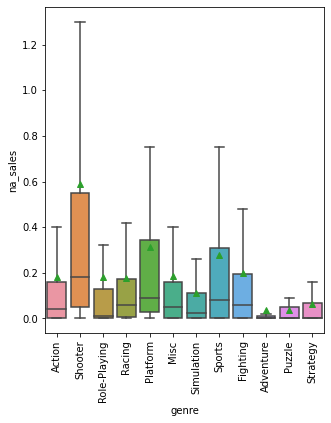

In [201]:
plt.figure(figsize = (5,6))
sns.boxplot(x='genre', y='na_sales', showmeans=True, data=year_filter, showfliers=False)
plt.xticks(rotation=90)
plt.show()

**In Europe, Shooter, Platform, Racing, Sports, and action genres, should be prioritized in the stated order.**

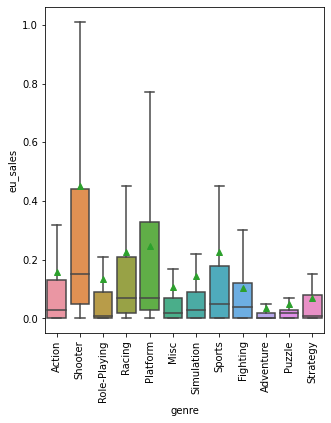

In [202]:
plt.figure(figsize = (5,6))
sns.boxplot(x='genre', y='eu_sales', showmeans=True, data=year_filter, showfliers=False)
plt.xticks(rotation=90)
plt.show()

**In Japan, Role-playing, Fighting, Action, and  Strategy genres, should be prioritized in the stated order.**

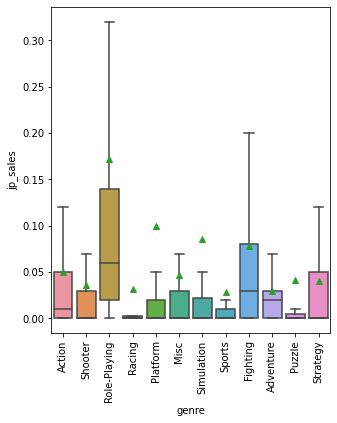

In [193]:
plt.figure(figsize = (5,6))
sns.boxplot(x='genre', y='jp_sales', showmeans=True, data=year_filter, showfliers=False)
plt.xticks(rotation=90)
plt.show()

In [1]:
plt.figure(figsize = (5,5))
sns.scatterplot(data=df, x="rating", y="na_sales")
plt.show()

NameError: name 'plt' is not defined

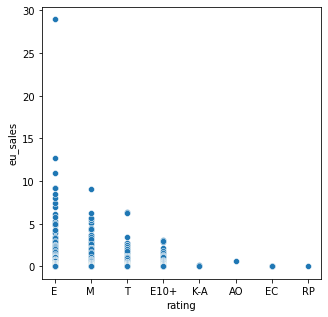

In [78]:
plt.figure(figsize = (5,5))
sns.scatterplot(data=df, x="rating", y="eu_sales")
plt.show()

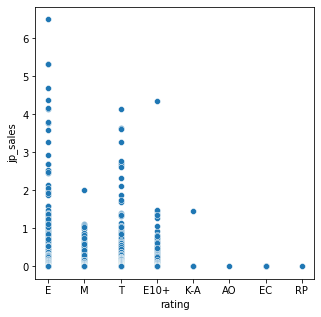

In [79]:
plt.figure(figsize = (5,5))
sns.scatterplot(data=df, x="rating", y="jp_sales")
plt.show()

## Creating a user profile for each region ##

**Market Share** 
>***Unfiltered dataframe platform distribution*** **:**

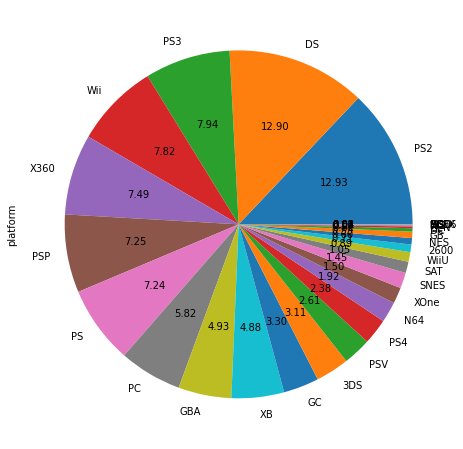

In [85]:
plt.figure(figsize=(8, 8))
df.platform.value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

>**Most Popular Plaforms distribution 2010 - 16**   :

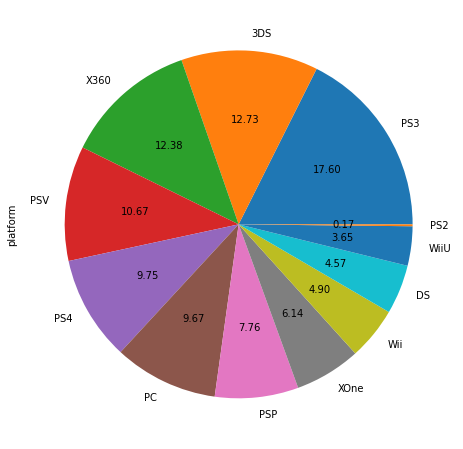

In [86]:
plt.figure(figsize=(8, 8))
year_filter.platform.value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

>>**The top five platforms in North America: X360, Xone, PS3, PS4, and WiiU; boxplot included,** ***infra***.

In [87]:
na_platforms = year_filter.groupby(['platform', 'year_of_release']).agg({'na_sales': ['sum']})
na_platforms.sort_values

<bound method DataFrame.sort_values of                          na_sales
                              sum
platform year_of_release         
3DS      2011               27.34
         2012               17.11
         2013               15.56
         2014               12.33
         2015                6.17
         2016                4.14
DS       2011               14.27
         2012                4.02
         2013                0.57
PC       2011               10.76
         2012                8.01
         2013                3.88
         2014                3.51
         2015                2.36
         2016                1.36
PS2      2011                0.13
PS3      2011               64.88
         2012               39.88
         2013               41.45
         2014               16.39
         2015                4.99
         2016                0.67
PS4      2013               10.13
         2014               34.75
         2015               42.37
         

**In Europe, the most popular platforms are PS4, X360, PS3, XOne, and WiiU; boxplot included,** ***infra.*** 

In [89]:
eu_platforms = year_filter.groupby(['platform', 'year_of_release']).agg({'eu_sales': ['sum']})
eu_platforms.sort_values




<bound method DataFrame.sort_values of                          eu_sales
                              sum
platform year_of_release         
3DS      2011               18.63
         2012               11.68
         2013               14.84
         2014                8.73
         2015                5.06
         2016                2.33
DS       2011                5.71
         2012                2.68
         2013                0.85
PC       2011               18.94
         2012               12.40
         2013                7.39
         2014                8.87
         2015                5.57
         2016                3.53
PS2      2011                0.13
PS3      2011               56.24
         2012               39.05
         2013               42.27
         2014               18.24
         2015                6.04
         2016                1.26
PS4      2013               11.05
         2014               46.50
         2015               51.76
         

**In Japan, the most popular platforms are 3DS, PSP, PS3, WiiU, PSV; boxplot included,** ***infra.***

In [90]:
jp_platforms = year_filter.groupby(['platform', 'year_of_release']).agg({'jp_sales': ['sum']})
jp_platforms.sort_values


<bound method DataFrame.sort_values of                          jp_sales
                              sum
platform year_of_release         
3DS      2011               12.83
         2012               19.98
         2013               23.57
         2014               20.69
         2015               15.52
         2016                8.03
DS       2011                4.32
         2012                3.72
         2013                0.00
PC       2011                0.00
         2012                0.00
         2013                0.00
         2014                0.00
         2015                0.00
         2016                0.00
PS2      2011                0.09
PS3      2011               14.10
         2012               11.94
         2013               12.13
         2014                6.25
         2015                3.67
         2016                1.30
PS4      2013                0.94
         2014                2.97
         2015                6.31
         

In [91]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,na_sales_total,eu_sales_total,jp_sales_total,other_sales_total,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,1.644400e+04,16444.00,1.644400e+04,1.644400e+04,1.644400e+04
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,4.341420e+03,2399.68,1.290640e+03,7.826300e+02,1.315579e+04
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,9.095224e-13,0.00,2.273806e-13,2.273806e-13,1.819045e-12
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,4.341420e+03,2399.68,1.290640e+03,7.826300e+02,1.315579e+04
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,4.341420e+03,2399.68,1.290640e+03,7.826300e+02,1.315579e+04
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,4.341420e+03,2399.68,1.290640e+03,7.826300e+02,1.315579e+04
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,4.341420e+03,2399.68,1.290640e+03,7.826300e+02,1.315579e+04
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,4.341420e+03,2399.68,1.290640e+03,7.826300e+02,1.315579e+04


**In North America, the sales mean/median is $200K/4K. Most platforms' distributions are positively skewed, with the aforemention most popular platforms accounting for the greatest marketshare.**

In [92]:
year_filter.na_sales.describe()

count    4022.000000
mean        0.206305
std         0.570441
min         0.000000
25%         0.000000
50%         0.040000
75%         0.170000
max         9.660000
Name: na_sales, dtype: float64

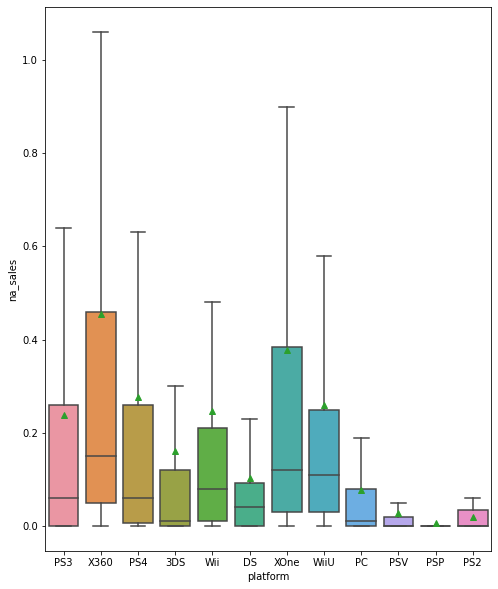

In [93]:
plt.figure(figsize = (8,10))
sns.boxplot(x='platform', y='na_sales', showmeans=True, data=year_filter, showfliers=False)
plt.show()

In [94]:
year_filter.eu_sales.describe()

count    4022.000000
mean        0.166532
std         0.482864
min         0.000000
25%         0.000000
50%         0.030000
75%         0.130000
max         9.090000
Name: eu_sales, dtype: float64

**In Europe, the sales mean/median is $200K/4K. PS4 is the market leader,followed by the foregoing popular platforms. However, there, PS2 is negatively skewed, and PC games are mor eprofitable than in North America.**

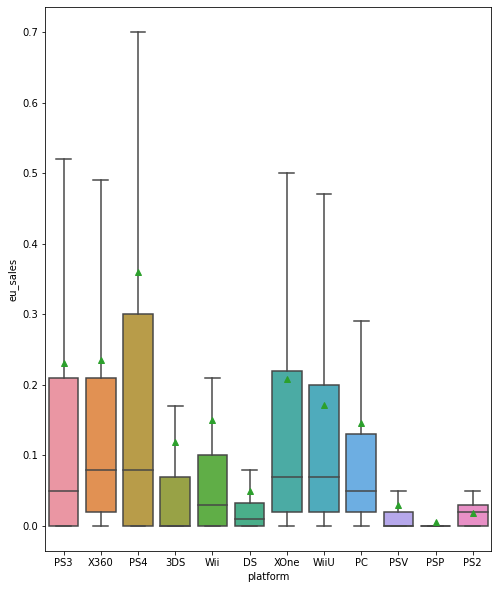

In [95]:
plt.figure(figsize = (8,10))
sns.boxplot(x='platform', y='eu_sales', showmeans=True, data=year_filter, showfliers=False)
plt.show()

In [96]:
year_filter.jp_sales.describe()

count    4022.000000
mean        0.061077
std         0.220248
min         0.000000
25%         0.000000
50%         0.000000
75%         0.050000
max         4.390000
Name: jp_sales, dtype: float64

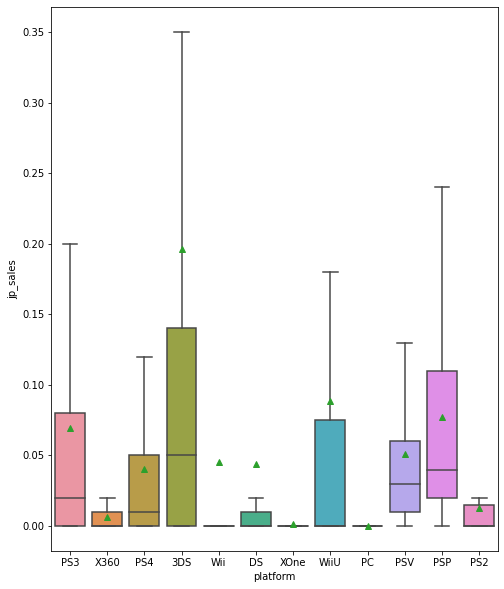

In [97]:
plt.figure(figsize = (8,10))
sns.boxplot(x='platform', y='jp_sales', showmeans=True, data=year_filter, showfliers=False)
plt.show()

In [100]:
#plt.figure(figsize = (25,30))
#games_na = year_filter.groupby(["platform", 'name']).sum().sort_values("na_sales",  ascending=False).boxplot()
#plt.xticks(rotation=90)
#plt.show()
##plt.figure(figsize = (50,100))
##ax = sns.boxplot(x='name', y='total_sales, data=games_na,  palette="Set3", linewidth=.5, showfliers = True)
##plt.xticks(rotation=90)
#plt.show()#

In [101]:
df.query('platform == "3DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,release_year,na_sales_total,eu_sales_total,jp_sales_total,other_sales_total,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,NaN,4341.42,2399.68,1290.64,782.63,13155.79
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,7,4341.42,2399.68,1290.64,782.63,13155.79
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,NaN,4341.42,2399.68,1290.64,782.63,13155.79
53,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E,3,4341.42,2399.68,1290.64,782.63,13155.79
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,2,4341.42,2399.68,1290.64,782.63,13155.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16648,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,4341.42,2399.68,1290.64,782.63,13155.79
16653,Nintendogs and Cats Golden Retriever and New F...,3DS,2011,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN,4341.42,2399.68,1290.64,782.63,13155.79
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,4341.42,2399.68,1290.64,782.63,13155.79
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,4341.42,2399.68,1290.64,782.63,13155.79


In [102]:
popular_platforms = df.query('platform == "PS3" | platform == "PS4" | platform == "X360" | platform == "XOne" | platform == "Wii"')

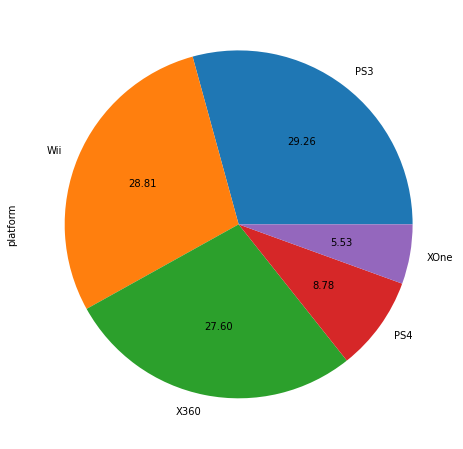

In [103]:
plt.figure(figsize=(8, 8))
popular_platforms.platform.value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

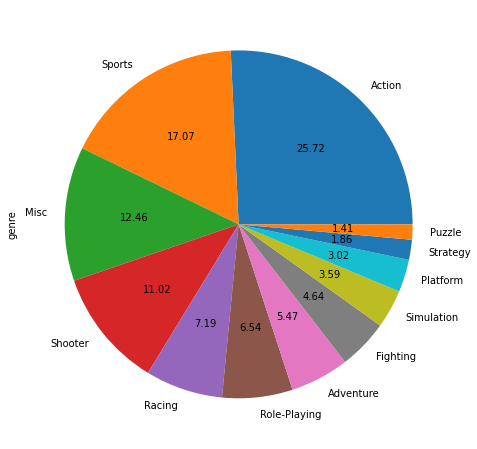

In [104]:
plt.figure(figsize=(8, 8))
popular_platforms.genre.value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

<AxesSubplot:xlabel='year_of_release'>

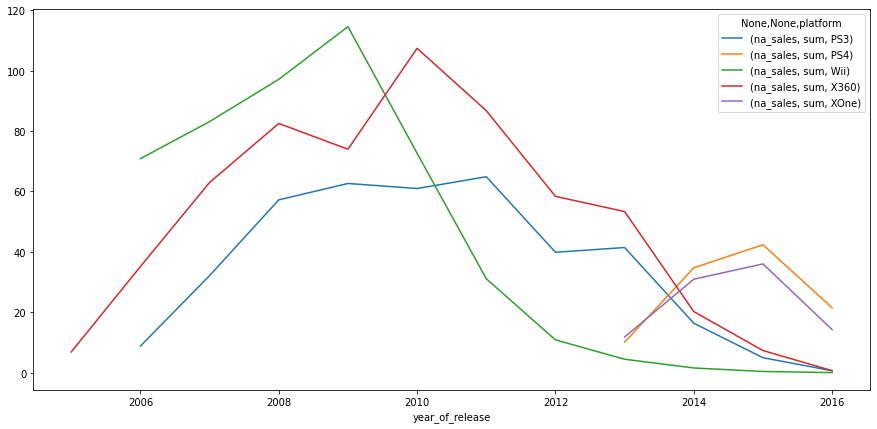

In [105]:
fig, ax = plt.subplots(figsize=(15,7))
popular_platforms.groupby(['year_of_release', 'platform']).agg({'na_sales': ['sum']}).unstack().plot(ax=ax)



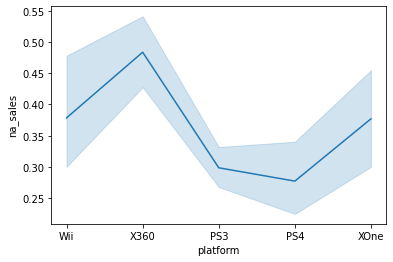

In [106]:
sns.lineplot(data=popular_platforms, x='platform', y='na_sales')
plt.show()

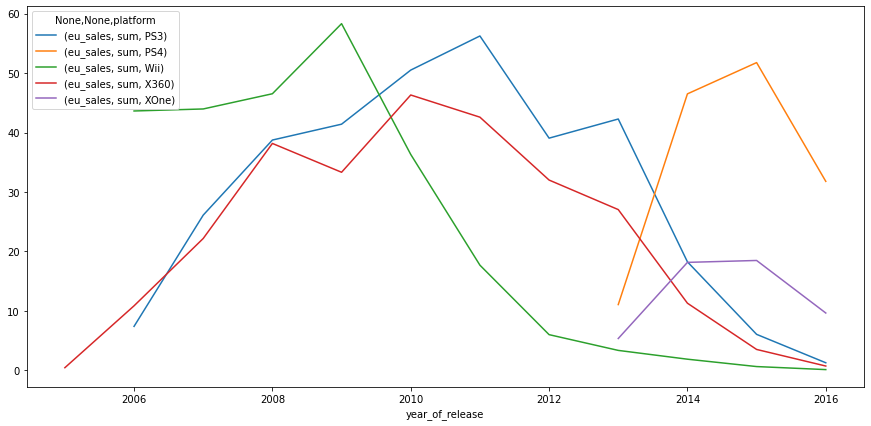

In [107]:
fig, ax = plt.subplots(figsize=(15,7))
popular_platforms.groupby(['year_of_release', 'platform']).agg({'eu_sales': ['sum']}).unstack().plot(ax=ax)
plt.show()


<AxesSubplot:xlabel='platform', ylabel='eu_sales'>

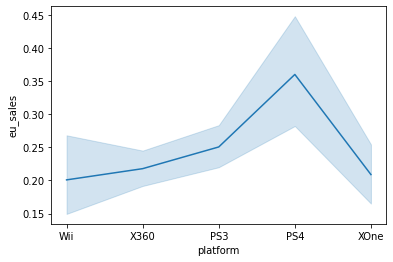

In [108]:
sns.lineplot(data=popular_platforms, x='platform', y='eu_sales')

<AxesSubplot:xlabel='year_of_release'>

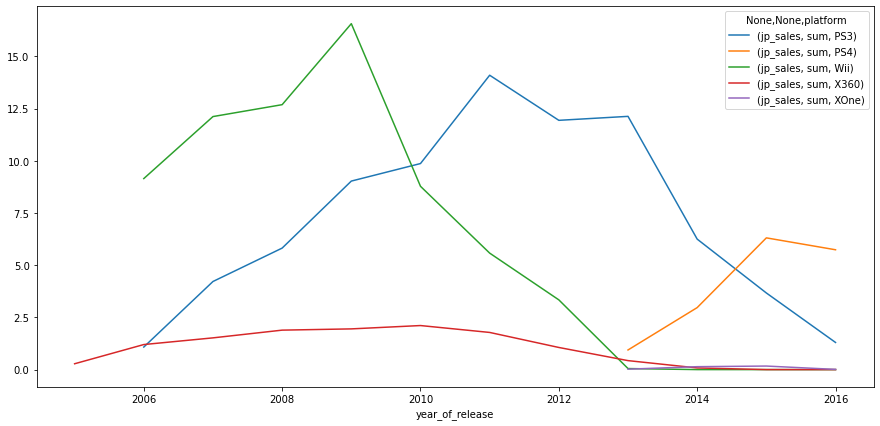

In [109]:
fig, ax = plt.subplots(figsize=(15,7))
popular_platforms.groupby(['year_of_release', 'platform']).agg({'jp_sales': ['sum']}).unstack().plot(ax=ax)

<AxesSubplot:xlabel='year_of_release'>

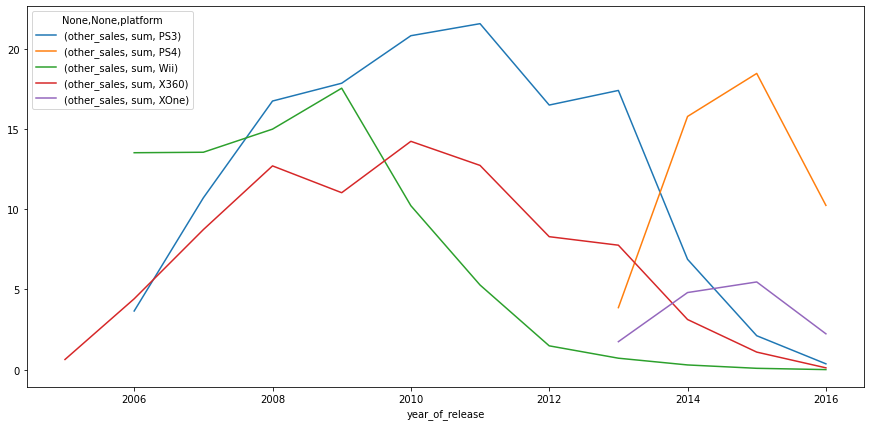

In [110]:
fig, ax = plt.subplots(figsize=(15,7))
popular_platforms.groupby(['year_of_release', 'platform']).agg({'other_sales': ['sum']}).unstack().plot(ax=ax)



## Hypothesis Testing ##

Here, for both sets of hypotheses posited, the variances of the statistical populations are different. Consequently, the appropriate method is scipy.stats.ttest_ind(array1, array2, equal_var=False). Although there is no overarching alpha value that determines statistical significance; nevertheless, 0.10, 0.05 and 0.01 are values commonly used therefor. Here, the decision to use "0.05" is based on a reasonable approach whereby the size of the populations are not so great, so that the corresponding   degree of freedom can be circumscribed by the most common alpha value.  
>>The results for XBox One / PC populations analysis:  Average user ratings of the Xbox One and PC platforms are the same.

>>The results for Action/ Sports genre populations analysis: Average user ratings for the Action and Sports genres are different


>**H0: Average user ratings of the Xbox One and PC platforms are the same.**

>**H1: Average user ratings of the Xbox One and PC platforms are different.**

In [111]:
df.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [112]:
year_filter.platform.unique()

array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
       'PSV', 'PSP', 'PS2'], dtype=object)

In [113]:
alpha = 0.05

In [114]:
xbox = year_filter.query('platform == "XOne"')
pc = year_filter.query('platform == "PC"')

In [115]:
xbox.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,na_sales_total,eu_sales_total,jp_sales_total,other_sales_total,total_sales
count,247.000000,247.000000,247.000000,247.000000,247.000000,169.000000,182.000000,247.00,2.470000e+02,2.470000e+02,247.00,2.470000e+02
mean,2014.951417,0.377004,0.208866,0.001377,0.057773,73.325444,6.521429,4341.42,2.399680e+03,1.290640e+03,782.63,1.315579e+04
std,0.952995,0.630618,0.365306,0.005153,0.094221,12.953465,1.380941,0.00,4.556707e-13,2.278353e-13,0.00,1.822683e-12
min,2013.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.600000,4341.42,2.399680e+03,1.290640e+03,782.63,1.315579e+04
25%,2014.000000,0.030000,0.020000,0.000000,0.010000,66.000000,5.800000,4341.42,2.399680e+03,1.290640e+03,782.63,1.315579e+04
50%,2015.000000,0.120000,0.070000,0.000000,0.020000,76.000000,6.800000,4341.42,2.399680e+03,1.290640e+03,782.63,1.315579e+04
75%,2016.000000,0.385000,0.220000,0.000000,0.060000,82.000000,7.500000,4341.42,2.399680e+03,1.290640e+03,782.63,1.315579e+04
max,2016.000000,4.590000,2.190000,0.040000,0.680000,97.000000,9.200000,4341.42,2.399680e+03,1.290640e+03,782.63,1.315579e+04


In [116]:
pc.describe() 

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,na_sales_total,eu_sales_total,jp_sales_total,other_sales_total,total_sales
count,389.000000,389.000000,389.000000,389.0,389.000000,289.000000,307.000000,3.890000e+02,3.890000e+02,3.890000e+02,389.00,389.00
mean,2012.922879,0.076812,0.145758,0.0,0.028535,74.851211,6.451792,4.341420e+03,2.399680e+03,1.290640e+03,782.63,13155.79
std,1.863711,0.203884,0.264761,0.0,0.066050,10.859040,1.611303,1.821332e-12,4.553330e-13,2.276665e-13,0.00,0.00
min,2011.000000,0.000000,0.000000,0.0,0.000000,33.000000,1.400000,4.341420e+03,2.399680e+03,1.290640e+03,782.63,13155.79
25%,2011.000000,0.000000,0.020000,0.0,0.000000,69.000000,5.550000,4.341420e+03,2.399680e+03,1.290640e+03,782.63,13155.79
50%,2012.000000,0.010000,0.050000,0.0,0.010000,76.000000,6.800000,4.341420e+03,2.399680e+03,1.290640e+03,782.63,13155.79
75%,2015.000000,0.080000,0.130000,0.0,0.030000,83.000000,7.700000,4.341420e+03,2.399680e+03,1.290640e+03,782.63,13155.79
max,2016.000000,2.440000,2.160000,0.0,0.600000,96.000000,9.300000,4.341420e+03,2.399680e+03,1.290640e+03,782.63,13155.79


In [117]:
x_rating = xbox.user_score
pc_rating = pc.user_score

In [118]:
x_rating = x_rating.dropna() 
pc_rating = pc_rating.dropna()

In [119]:
ttest = st.ttest_ind(x_rating, pc_rating, equal_var=False)

print('p-value: ', ttest.pvalue)
print()
print('The variance of XBox user scores:', np.var(x_rating))
print('The variance of PC user scores:', np.var(pc_rating))
print()
print(ttest.pvalue)
if ttest.pvalue < alpha:    # alpha value is 0.05 or 5%
    print("We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

p-value:  0.6130712247638477

The variance of XBox user scores: 1.8965188383045526
The variance of PC user scores: 2.5878388099608483

0.6130712247638477
We are accepting null hypothesis


>**H0: Average user ratings for the Action and Sports genres are the same.**

>**H1: Average user ratings for the Action and Sports genres are different.**

In [120]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [121]:
action = year_filter.query('genre == "Action"')
sports = year_filter.query('genre == "Sports"')

In [122]:
action_rating = action.user_score
sports_rating = sports.user_score

In [123]:
action_rating = action_rating.dropna()
sports_rating = sports_rating.dropna()

In [124]:
ttest_two = st.ttest_ind(action_rating, sports_rating, equal_var=False)

print('p-value: ', ttest_two.pvalue)
print()
print('The variance of Action genre user scores:', np.var(action_rating))
print('The variance of Sports genre user scores:', np.var(sports_rating))
print()
print(ttest_two.pvalue)

if ttest_two.pvalue < alpha:    # alpha value is 0.05 or 5%
    print("We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

p-value:  8.285648549432565e-19

The variance of Action genre user scores: 1.8091482798664535
The variance of Sports genre user scores: 2.87079202194461

8.285648549432565e-19
We are rejecting null hypothesis


## Conclusion ##

*The foregoing analysis tends to indicate that advertisment campaign for "Ice" should emphacize the North American market insofar as it generates the most revenue. Overall, globally the campaign should target consumers of Sports and Action games. Nonethless, ROI will be maximized if the ad campaigns are tailored to the following guidance:*    
>>*In North America, Shooter, Sports, Platform, fighting, and action genres, should be prioritized in the stated order.**The top five platforms in North America: X360, Xone, PS3, PS4, and WiiU.*

>>*In Europe, Shooter, Platform, Racing, Sports, and action genres, should be prioritized in the stated order.** In Europe, the most popular platforms are PS4, X360, PS3, XOne, and WiiU.*

>>*In Japan, Role-playing, Fighting, Action, and  Strategy genres, should be prioritized in the stated order.In Japan, the most popular platforms are 3DS, PSP, PS3, WiiU, PSV*